In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("./tennis.csv")
df.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
df.shape

(14, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head(5)

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [ ]:
# what is .fit()
# whay is transform()
# fit_tansform()

In [ ]:
X = df.drop(['play'],axis=1)
X.head(4)

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0


In [ ]:
y = df.play

In [ ]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',splitter='best')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.3333333333333333, 0.875, 'x[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.625, 'x[3] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

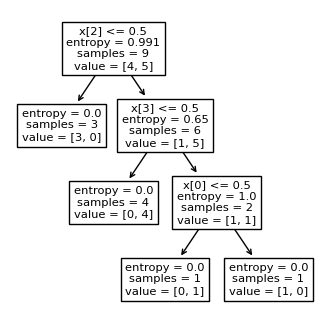

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=100)
tree.plot_tree(classifier)

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./cleaned_df.csv",index_col=0)
df.head(5)
df.shape

(303, 14)

In [ ]:
# age: The person’s age in years
# sex: The person’s sex (1 = male, 0 = female)
# cp: chest pain type
# — Value 0: asymptomatic
# — Value 1: atypical angina
# — Value 2: non-anginal pain
# — Value 3: typical angina
# trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
# chol: The person’s cholesterol measurement in mg/dl
# fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: resting electrocardiographic results
# — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
# — Value 1: normal
# — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# thalach: The person’s maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
# slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
# 0: downsloping; 1: flat; 2: upsloping
# ca: The number of major vessels (0–3)
# thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)
# target: Heart disease (1 = no, 0= yes)

In [ ]:
df.shape

(303, 14)

In [ ]:

X = df.drop('target',axis=1)
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0


In [ ]:
y = df['target']
y.head(4)

0    1
1    1
2    1
3    1
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#logitistic
#All import statements go here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB

In [ ]:
#This is an implementation of Logistic Regression Classifier with Hyperparameters calculated using Grid SearchCV
logreg = LogisticRegression(penalty='l2',C=0.615848211066026)
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)

#Metrics
lr_acc_score = accuracy_score(y_test,y_pred_log)
lr_f1_score = f1_score(y_test,y_pred_log)
lr_conf_matrix = confusion_matrix(y_test,y_pred_log)

#print
print(f"Accuracy Score : {lr_acc_score}")
print(f"F1 Score [Test] : {lr_f1_score}")
print("-**-**-"*8)
print("Confusion Matrix")
print(lr_conf_matrix)
print("-**-**-"*8)
print(classification_report(y_test,y_pred_log))

Accuracy Score : 0.9180327868852459
F1 Score [Test] : 0.9180327868852459
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
Confusion Matrix
[[28  3]
 [ 2 28]]
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.90      0.93      0.92        30

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
#This is an implementation of Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

#Metrics
tree_acc_score = accuracy_score(y_test,y_pred_tree)
tree_f1_score = f1_score(y_test,y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test,y_pred_tree)

#print
print(f"Accuracy Score : {tree_acc_score}")
print(f"F1 Score [Test] : {tree_f1_score}")
print("-**-**-"*8)
print("Confusion Matrix")
print(tree_conf_matrix)
print("-**-**-"*8)
print(classification_report(y_test,y_pred_tree))

Accuracy Score : 0.8360655737704918
F1 Score [Test] : 0.8387096774193549
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
Confusion Matrix
[[25  6]
 [ 4 26]]
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



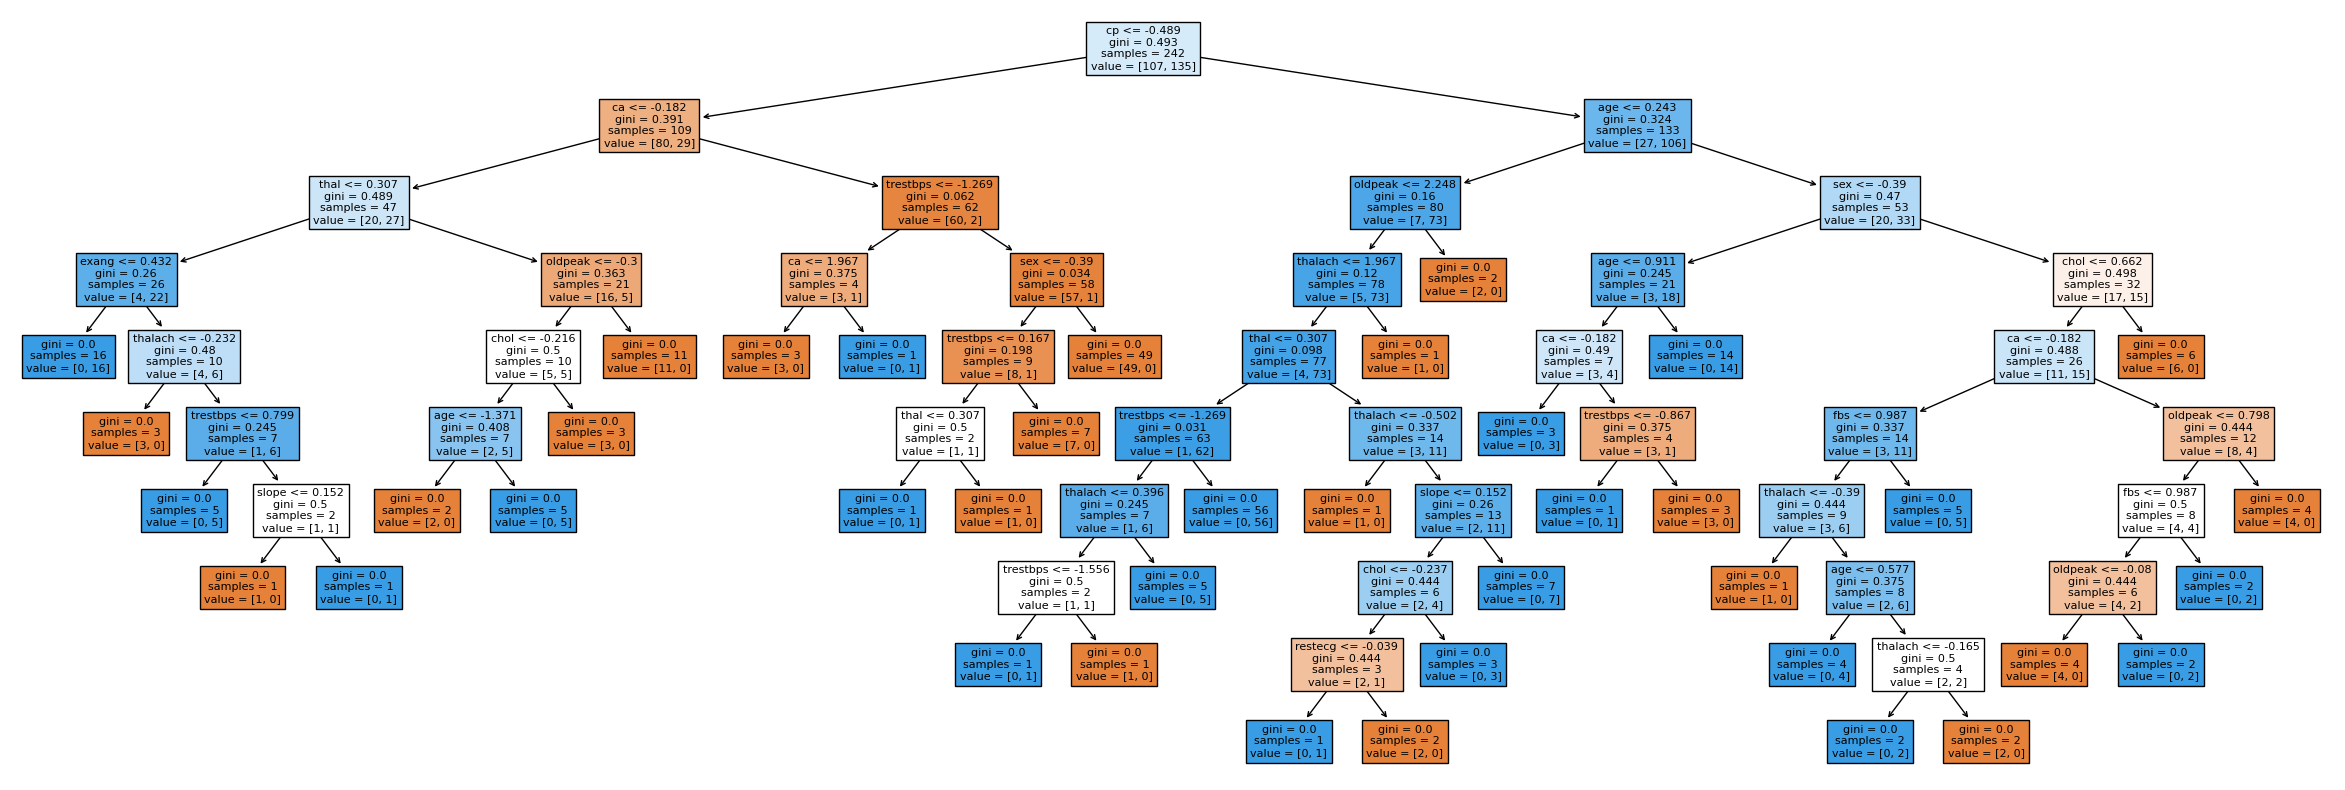

In [ ]:
#This is an implementation of printing a decision tree to visualize the aspects of tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)

plt.figure(figsize=(30, 10))

plot_tree(tree, filled=True, feature_names=["age", "sex", "cp", "trestbps", "chol", "fbs" ,"restecg" ,"thalach" ,"exang" ,"oldpeak" ,"slope" ,"ca", "thal"])
plt.show()

In [ ]:
#This is an implementation of Random Forest classifier
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(X_train,y_train)
y_pred_forest = rfc.predict(X_test)

#Metrics
rfc_acc_score = accuracy_score(y_test,y_pred_forest)
rfc_f1_score = f1_score(y_test,y_pred_forest)
rfc_conf_matrix = confusion_matrix(y_test,y_pred_forest)

#print
print(f"Accuracy Score : {rfc_acc_score}")
print(f"F1 Score [Test] : {rfc_f1_score}")
print("-**-**-"*8)
print("Confusion Matrix")
print(rfc_conf_matrix)
print("-**-**-"*8)
print(classification_report(y_test,y_pred_forest))

Accuracy Score : 0.8524590163934426
F1 Score [Test] : 0.8524590163934426
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
Confusion Matrix
[[26  5]
 [ 4 26]]
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.84      0.87      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Naive bayes algorithm

In [ ]:
#This is an implementation of Gaussian naive bayes classifier
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

#Metrics
nb_acc_score = accuracy_score(y_test,y_pred_nb)
nb_f1_score = f1_score(y_test,y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)

#print
print(f"Accuracy Score : {nb_acc_score}")
print(f"F1 Score [Test] : {nb_f1_score}")
print("-**-**-"*8)
print("Confusion Matrix")
print(nb_conf_matrix)
print("-**-**-"*8)
print(classification_report(y_test,y_pred_nb))

Accuracy Score : 0.9344262295081968
F1 Score [Test] : 0.9333333333333333
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
Confusion Matrix
[[29  2]
 [ 2 28]]
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.93      0.93      0.93        30

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [ ]:
# !pip3 install mlxtend

from mlxtend.classifier import StackingCVClassifier

In [ ]:
scv = StackingCVClassifier(classifiers=[logreg,nb,tree],meta_classifier=nb,)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test,scv_predicted)
scv_acc_score = accuracy_score(y_test,scv_predicted)
scv_f1_score = f1_score(y_test,scv_predicted)

print(f"scv_conf_matrix : {scv_conf_matrix}")
print(f"scv_acc_score : {scv_acc_score}")
print(f"scv_f1_score : {scv_f1_score}")

print(classification_report(y_test,scv_predicted))

scv_conf_matrix : [[28  3]
 [ 2 28]]
scv_acc_score : 0.9180327868852459
scv_f1_score : 0.9180327868852459
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.90      0.93      0.92        30

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
model_ev = pd.DataFrame({"Model":['Logistic Regression',"Decision Tree","Random Forest","Naive Bayes"],
                        "Accuracy":[lr_acc_score,tree_acc_score,rfc_acc_score,nb_acc_score],
                        "F1 Score":[lr_f1_score,tree_f1_score,rfc_f1_score ,nb_f1_score]})
model_ev

,Model,Accuracy,F1 Score
0,Logistic Regression,0.918033,0.918033
1,Decision Tree,0.836066,0.838710
2,Random Forest,0.852459,0.852459
3,Naive Bayes,0.934426,0.933333


In [ ]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test,y_pred_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test,y_pred_tree)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test,y_pred_forest)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,y_pred_nb)

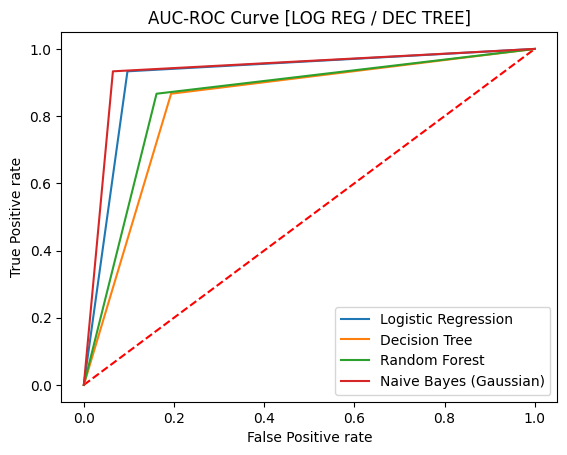

In [ ]:
plt.plot([0,1],[0,1],'r--')

plt.plot(fpr_log,tpr_log,label='Logistic Regression')
plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rfc,tpr_rfc,label='Random Forest')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes (Gaussian)')
plt.title("AUC-ROC Curve [LOG REG / DEC TREE]")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')


In [ ]:
#Logostic Regression

param_grid_log = {'penalty':['l1', 'l2'],
                 'C':np.logspace(-4, 4, 20),}

grid_search_log = GridSearchCV(estimator=logreg, param_grid=param_grid_log,cv=7,scoring='accuracy',n_jobs=-1)

grid_search_log.fit(X_train,y_train)

log_params = grid_search_log.best_params_
print(log_params)

{'C': 0.615848211066026, 'penalty': 'l2'}


In [ ]:
#Decision Tree
param_grid_tree = {'criterion' : ["gini", "entropy"],
                  "max_depth" : [2,3,4,5,6],
                  "min_samples_leaf": [6,7,8],
                  "max_leaf_nodes": [12, 13,14,15],
                  "splitter":["best", "random"],}

grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree,cv=7,scoring='accuracy',n_jobs=-1)

grid_search_tree.fit(X_train,y_train)

tree_params = grid_search_tree.best_params_
print(tree_params)

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_leaf': 7, 'splitter': 'random'}


In [ ]:
#Random Forest
import time

st = time.time()

param_grid_forest = {'criterion' : ["gini", "entropy"],
                  "max_depth" : [2,3,4,5,6],
                  "max_leaf_nodes": [12, 13,14,15,20,50,100],
                  "max_features":["sqrt", "log2"]}

grid_search_forest = GridSearchCV(estimator=rfc, param_grid=param_grid_forest,cv=7,scoring='accuracy',n_jobs=-1)

grid_search_forest.fit(X_train,y_train)

forest_params = grid_search_forest.best_params_
print(forest_params)

ed = time.time()

print(f"Total time to run this code was : {ed-st:.2f} Seconds")

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 13}
Total time to run this code was : 188.74 Seconds


In [ ]:
# 15 -> 300
# X  -> 100000

# x * 300 = 15 * 100000

# x = 15 * 100000 / 300

In [ ]:
#NAIVE BAYES
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [ ]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
#Niave Bayes
param_grid_nb = {'var_smoothing' : np.logspace(0,-20,num=2)}

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb,cv=7,scoring='accuracy',n_jobs=-1)

grid_search_nb.fit(X_train,y_train)

nb_params = grid_search_nb.best_params_
print(nb_params)

{'var_smoothing': 1.0}


In [ ]:
#this number which is added to each feature to balance out datasets

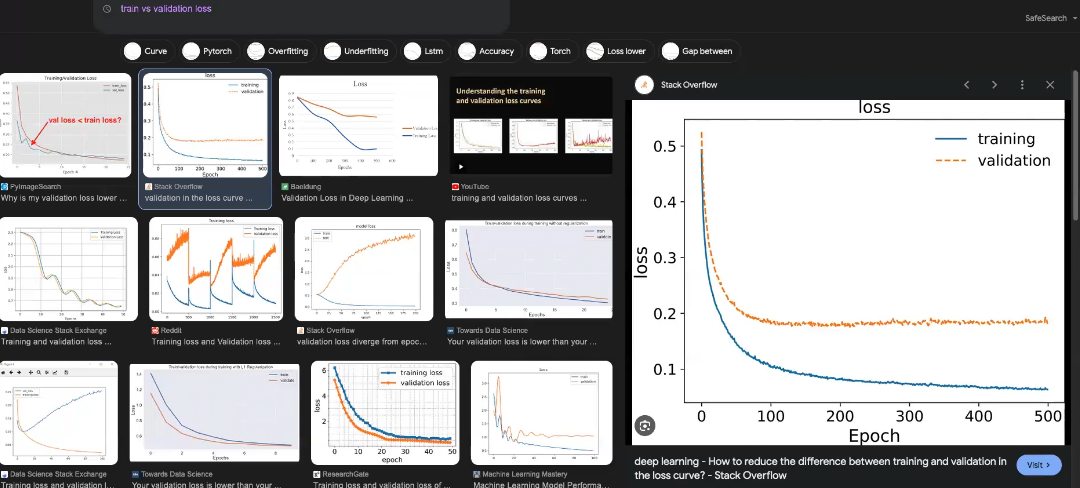

![image.png](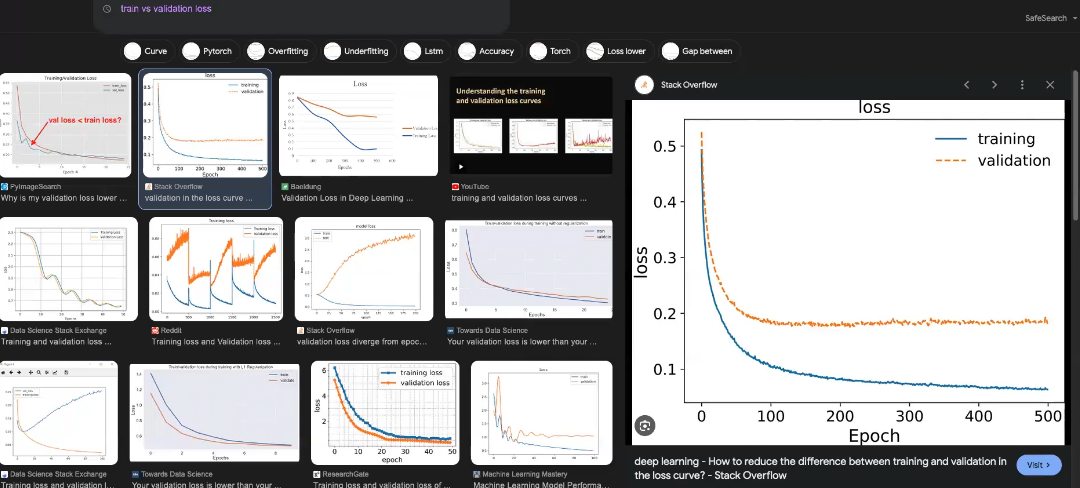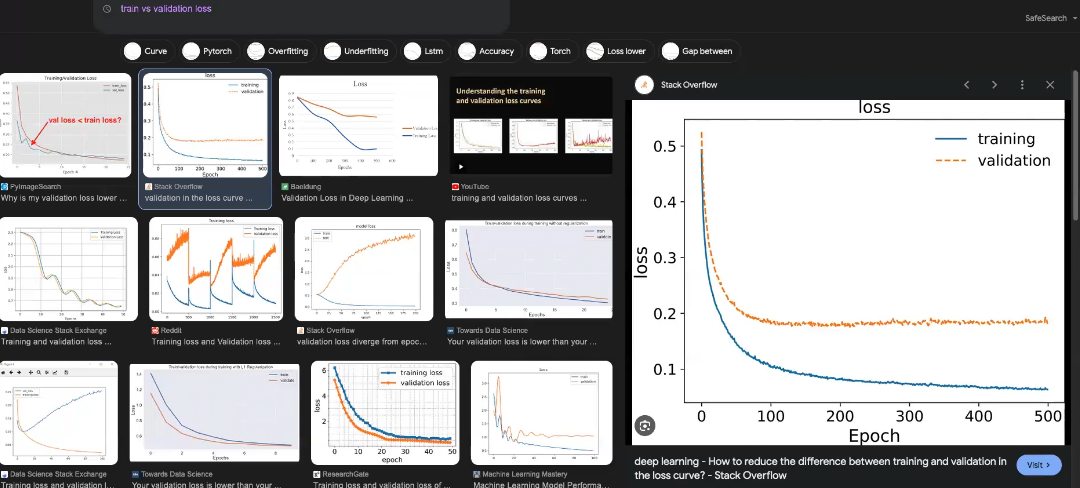)

In [ ]:
#trainning vs validation is decerasing simultaneously then  it is the right fit
#if training is increasing with decrease in validation it is underfitting

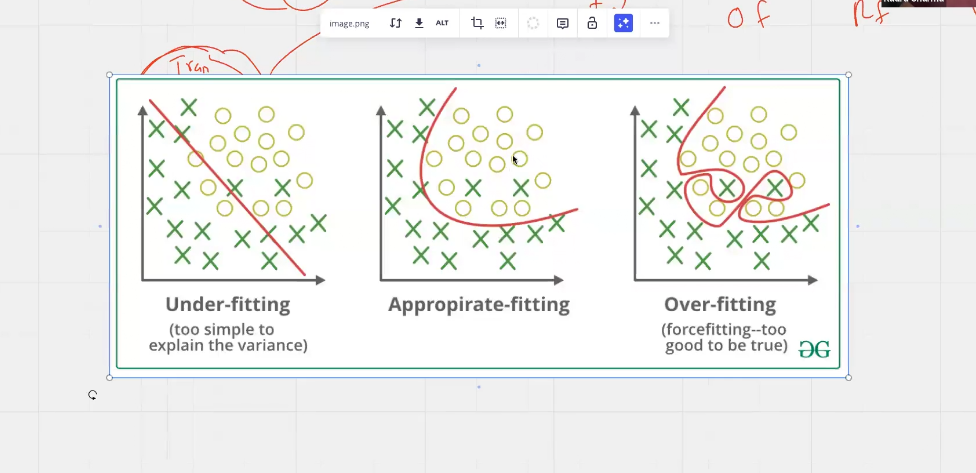

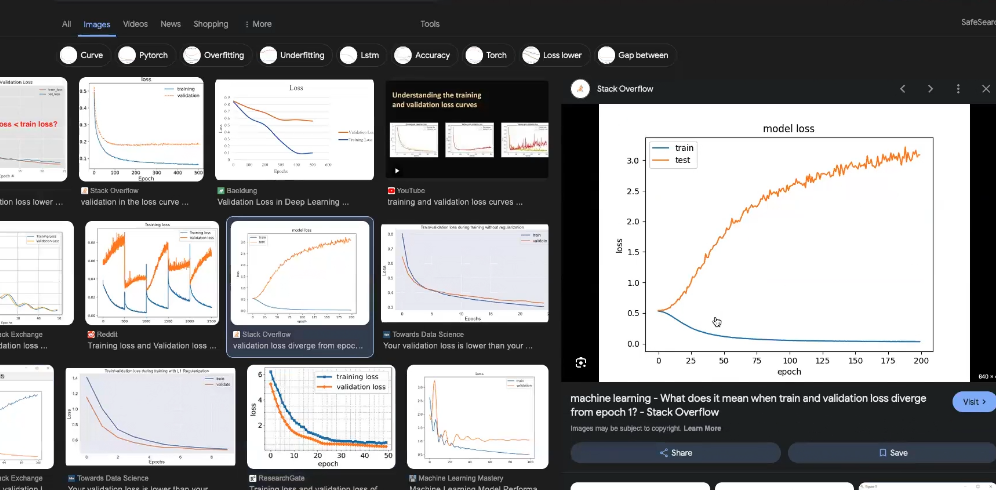

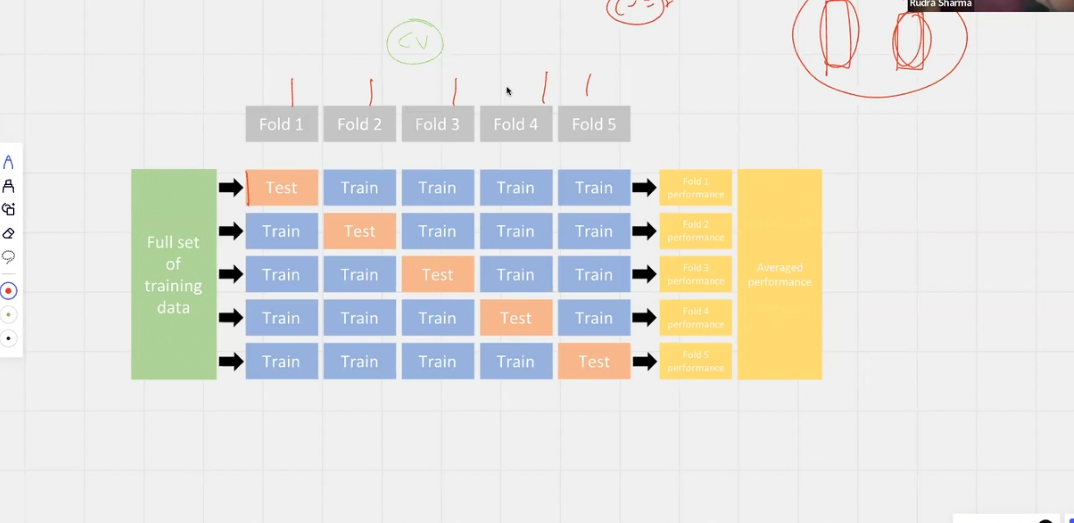

In [ ]:
#When we split the data into traning and testing data it is possible that the training data is very good and testing data is bad .
#we do this so that biasness in training and testing data is not there.#this is known as k fold cross validation(or K fold Cv).
#we dont want some data to go to traning and some data to testing and show  biasness we want equal importance,We want equal importance to all the dataset

In [ ]:
#parameters in random Search CV and grid Search CV is to improve the model performance

In [ ]:
#in order to reduce bias and variance use cross validation,make the data more complex ,increase the training data,ensemble Learning

In [ ]:
!pip3 install mlxtend

In [ ]:
from mlxtend.classifier import StackingCVClassifier

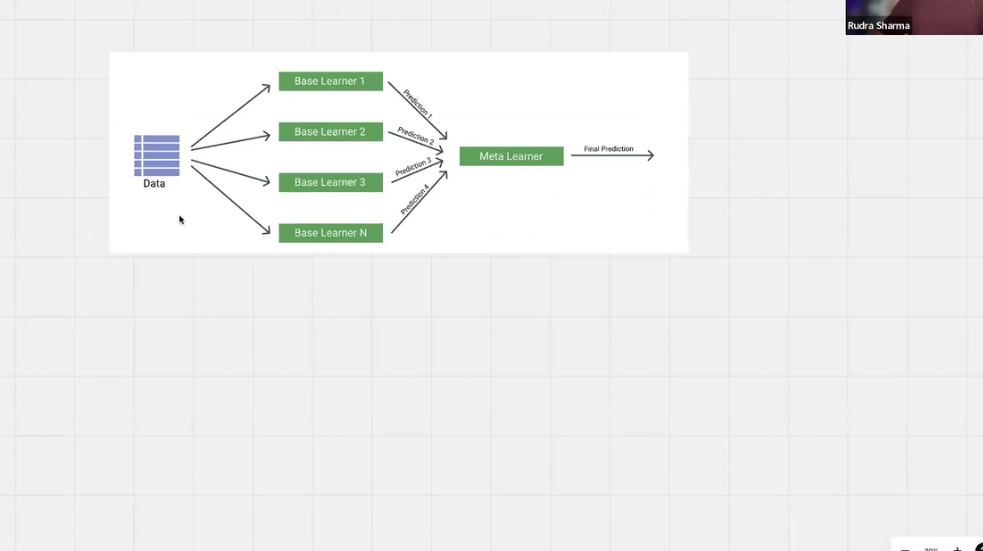

In [ ]:
#the above picture is an example of stacking classifier in which we pass multiple algorithms to the dataset after that vote macting is done then we pass final algorithm to the dataset
#lets say SVM that gives the prediction .no bias no variance it is balanced.

In [ ]:
scv=StackingCVClassifier(classifiers=[logreg,nb,tree],meta_classifier=nb,random_state=22)
scv.fit(X_train,y_train)#I wanted the random state the seat to be fixed
scv_predicted=scv.predict(X_test)  #in this we are not finding the best classifier for this we have aoc_roc_score
scv_conf_matrix=confusion_matrix(y_test,scv_predicted)#we are passing multiple algorithms to get the combined predictions
scv_acc_score=accuracy_score(y_test,scv_predicted)
scv_f1_score=f1_score(y_test,scv_predicted)
print(f"Scv Confusion_matrix{scv_conf_matrix}")
print(f"Scv accuracy score:{scv_acc_score}")
print(f"F1_score:{scv_f1_score}")

classification_report(y_test,scv_predicted)

Scv Confusion_matrix[[28  3]
 [ 2 28]]
Scv accuracy score:0.9180327868852459
F1_score:0.9180327868852459


'              precision    recall  f1-score   support\n\n           0       0.93      0.90      0.92        31\n           1       0.90      0.93      0.92        30\n\n    accuracy                           0.92        61\n   macro avg       0.92      0.92      0.92        61\nweighted avg       0.92      0.92      0.92        61\n'

In [ ]:
#we can do normalisation for both classification as well as regression it depends more on the feautue you have.